# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-2 (39일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기

## 성별이나 연령에 따라 아픈 곳이 다를까?

공공 테이터 포털 (data.go.kr) 에서 각 정부부처에서 공개한 데이터들을 볼 수 있습니다. 그 중에서 건강보험공간에서 공개한 100만 건의 진료내역 정보를 살펴 봅시다. 원본 데이터는 2015년 약 100만건의 진료내역을 담고 있으나. 우리는 서울의 외래 진료내역인 약 200만건 데이터를 살펴 볼 것입니다.

In [2]:
treat = read.csv("Practice/data/treat.csv")

In [3]:
# 데이터의 구성을 살펴 볼 것입니다.
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : int  12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : int  2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


   * 이 데이터는 원본데이터를 가공한것입니다.
   * 5개의 변수를 선택하고, 숫자로 코딩되어 있던 AGE (연령대) 와 DSBJT(진료과목)을 건강보험공단의 코딩표를 참조하여 보기 쉽게 수정했습니다.
   * MAIN_SICK 은 환자가 병원에서 진료를 받을 때 질병의 종류를 구분한 코드 입니다.
   
   
   * str() 함수로 살펴 본 바, MONTH(수진월) 과 SEX(성별) 이 int 형태로 구렁되어 있습니다.
   * 의미상 범주형이므로 factor 를 사용해서 범주형 변수로 바꾸고 수준 이름도 바꿔 봅니다.

In [4]:
treat$MONTH = factor(treat$MONTH)
treat$SEX = factor(treat$SEX)
levels(treat$SEX)

[1] "1" "2"

In [5]:
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : Factor w/ 12 levels "1","2","3","4",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : Factor w/ 2 levels "1","2": 2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


MONTH 와 SEX 가 범주형 변수로 바뀌었습니다. 이제 levels 를 이용해서 수준을 바꾸어 봅니다.

In [6]:
levels(treat$SEX) = c("1_남", "2_여")

In [7]:
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : Factor w/ 12 levels "1","2","3","4",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : Factor w/ 2 levels "1_남","2_여": 2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


 #### treat 에서 성별이나 년령에 따라 아픈 곳 분석

   * 두개의 범주형 변수를 요약.
   * 변수가 2개가 되는 변수 사이의 관계를 살펴봄.
   * 하나의 변수를 요약할 경우와 마찬가지로 2개의 변수를 테이블에 넣어서 교차표를 만듭니다.
   
   
   * 먼저 AGE, SEX(성별) 을 먼저 넣어서 살펴봅니다.

In [8]:
table(treat$AGE, treat$SEX)

             
                1_남   2_여
  01_0-4세     84391  77220
  02_5-9세     52402  46407
  03_10-14세   29765  27431
  04_15-19세   31413  29411
  05_20-24세   24710  36752
  06_25-29세   30705  54537
  07_30-34세   38341  75842
  08_35-39세   42272  68918
  09_40-44세   49677  68486
  10_45-49세   52625  75166
  11_50-54세   62114  95169
  12_55-59세   70529 113771
  13_60-64세   68529  98913
  14_65-69세   69066  98229
  15_70-74세   67366  83405
  16_75-79세   44145  60798
  17_80-84세   22575  34632
  18_85세이상  11027  20044

   * 연령별 남녀 비율을 흝어보면 남녀의 비율이 다릅니다. 여자가 많은 년령대도 있고, 남자가 많은 년령대도 있습니다.
   * 이런 경우는 행백분율 또는 열 백분율로 보는것이 더 효율적입니다.
   
   * 행 백분율은 각 행의 합계를 1로 봤을 때 각각의 열이 차자하는 비중의 크기를 살피는 것이고
   * 열 백분율은 각 열의 합계를 1로 봤을 때 각각의 행이 차지하는 비중의 크기를 살피는 것입니다.
   
   
   * 함수 prop.table 이 행 백분율, 열 백분율을 계산하는 함수 입니다.

In [9]:
# 먼저 교차표를 만듭니다.
t_AGE_SEX = table(treat$AGE, treat$SEX)

In [11]:
# 행 백분율을 만듭니다.
round(prop.table(t_AGE_SEX, 1), 2)

             
              1_남 2_여
  01_0-4세    0.52 0.48
  02_5-9세    0.53 0.47
  03_10-14세  0.52 0.48
  04_15-19세  0.52 0.48
  05_20-24세  0.40 0.60
  06_25-29세  0.36 0.64
  07_30-34세  0.34 0.66
  08_35-39세  0.38 0.62
  09_40-44세  0.42 0.58
  10_45-49세  0.41 0.59
  11_50-54세  0.39 0.61
  12_55-59세  0.38 0.62
  13_60-64세  0.41 0.59
  14_65-69세  0.41 0.59
  15_70-74세  0.45 0.55
  16_75-79세  0.42 0.58
  17_80-84세  0.39 0.61
  18_85세이상 0.35 0.65

   * 20 세 이전 까지는 남자의 비중이 높다가, 20세 이후에는 여자의 비중이 높습니다.
   * 20세 이후에 남자가 더 건강하다기 보다는 부모의 품을 떠난 20세 이후 부터는 아파도 자주 병원을 찾지 않는 것으로 추측된다고 합니다.

In [12]:
# 열 백분율을 살표 보아요
round(prop.table(t_AGE_SEX, 2), 2)

             
              1_남 2_여
  01_0-4세    0.10 0.07
  02_5-9세    0.06 0.04
  03_10-14세  0.03 0.02
  04_15-19세  0.04 0.03
  05_20-24세  0.03 0.03
  06_25-29세  0.04 0.05
  07_30-34세  0.05 0.07
  08_35-39세  0.05 0.06
  09_40-44세  0.06 0.06
  10_45-49세  0.06 0.06
  11_50-54세  0.07 0.08
  12_55-59세  0.08 0.10
  13_60-64세  0.08 0.08
  14_65-69세  0.08 0.08
  15_70-74세  0.08 0.07
  16_75-79세  0.05 0.05
  17_80-84세  0.03 0.03
  18_85세이상 0.01 0.02

   * 영유아기를 제외 하고는 연령대 별로 비중이 남녀 모두 년령이 늘어 날 수로 비중이 늘어 납니다.
   * 남녀간에 차이는 딱히 보이질 않습니다.
   
   
   * 이번에는 진료과목과 성별의 관계를 살표 보아요.
   * 진료과목은 DSJBT, SEX 교차표를 만들어 봅니다.

In [14]:
t_DSBJT_SEX = table(treat$DSBJT, treat$SEX)

In [15]:
t_DSBJT_SEX

                
                   1_남   2_여
  가정의학과      23084  30858
  내과           301448 375998
  마취통증의학과   9959  14310
  방사선종양학과   1456   2497
  비뇨기과        31288  18622
  산부인과          948  84793
  성형외과         2305   1872
  소아청소년과    57119  57195
  신경과          11513  16922
  신경외과        12478  16828
  안과            54417  78565
  영상의학과        943   1622
  외과            26576  36104
  응급의학과       7992   8826
  이비인후과      91732 114036
  재활의학과      10238  13339
  정신과          18134  24400
  정형외과       133522 205032
  피부과          54387  61572
  흉부외과         2113   1740

   * 산부인과에 남자 환자가 있는게 신기합니다. 이것도 나중에 살펴봐야 할 것 같습니다.
   * 열 백분율, 행 백분율을 구해서 비율을 살펴보면 좀더 자세한 내용을 살펴 볼 수 도 있지만, 색깔을 열지도를 이용하면 한 눈에 살펴 볼 수 있습니다.
   
   
   * heatmap() 함수를 이용합니다.

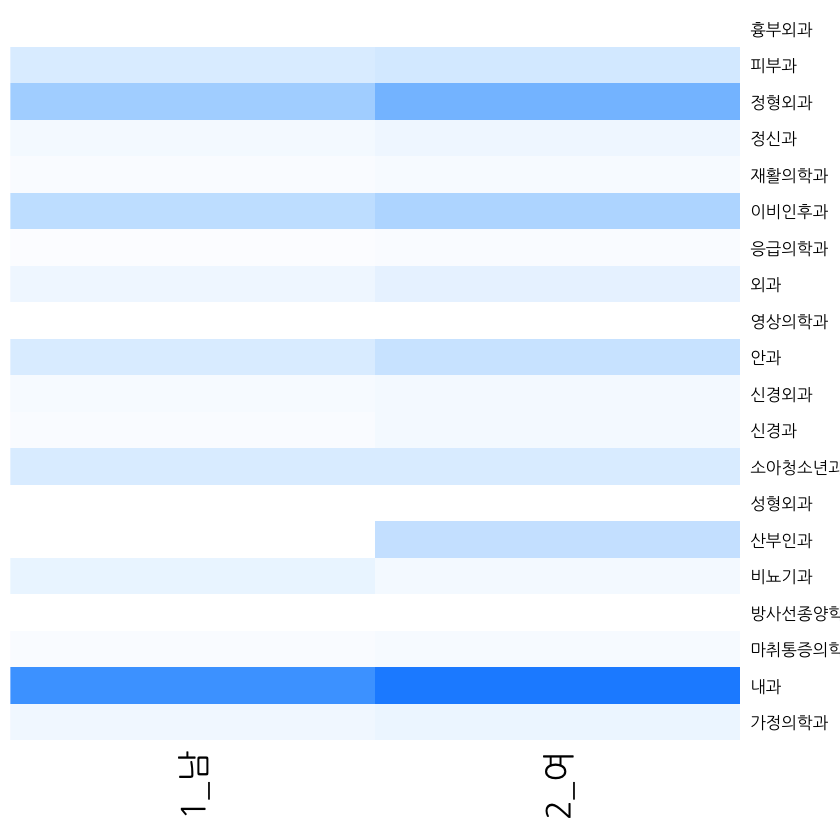

In [48]:
par(family="NanumGothic")  #   폰트 지정
options(warn=-1)
heatmap(t_DSBJT_SEX, col=colorRampPalette(c('white', 'dodgerblue'))(100), scale='none', Rowv=NA, Colv=NA, cexRow=1, cexCol=2)

   * 내과가 남녀 불문 제일 진합니다.
   
   
   * 행 백분율을 heatmap 으로 표시합니다.

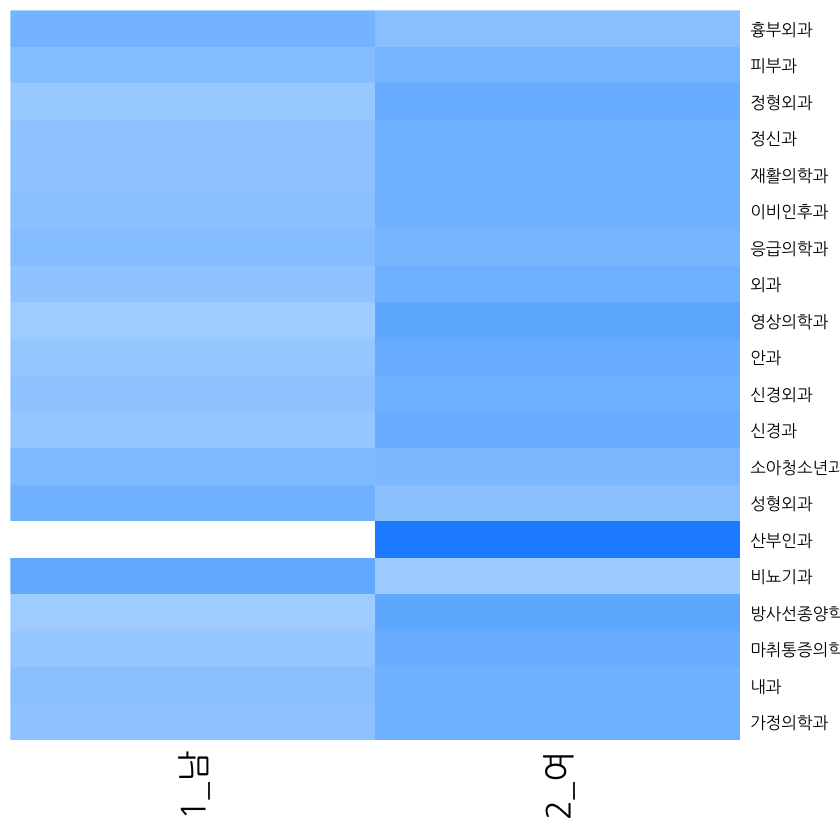

In [47]:
par(family="NanumGothic")
options(warn=-1)
heatmap(prop.table(t_DSBJT_SEX,1), col=colorRampPalette(c('white', 'dodgerblue'))(100), scale='none', Rowv=NA, Colv=NA, cexRow=1, cexCol=2)

   * 여성이 전반적으로 색이 더 진합니다.
   
   * 이번에 열 백분율을 구해보면

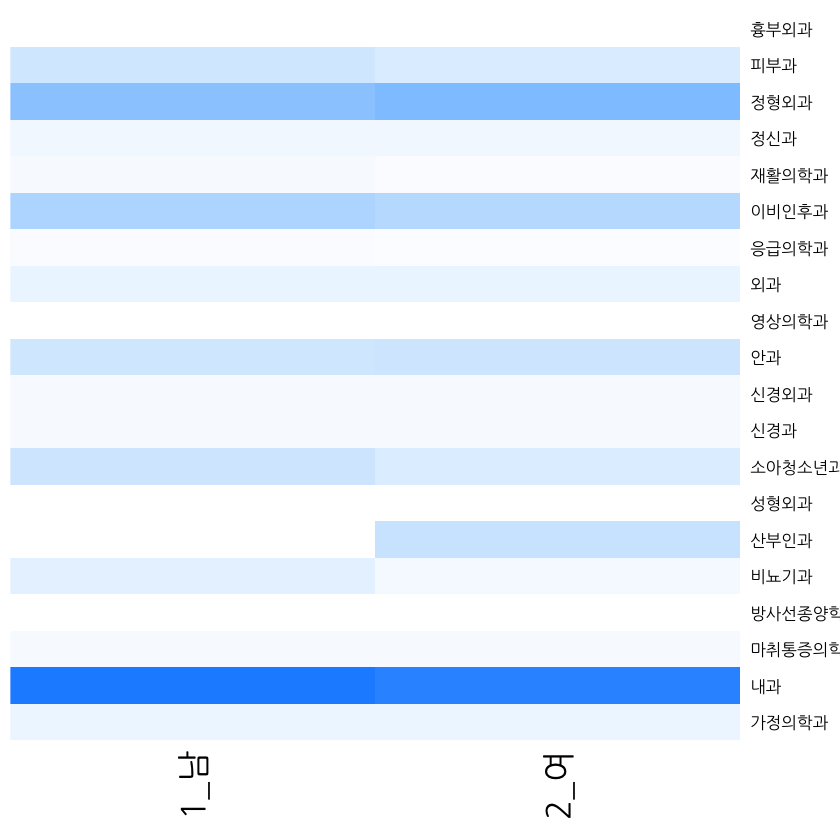

In [49]:
par(family="NanumGothic")
options(warn=-1)
heatmap(prop.table(t_DSBJT_SEX,2), col=colorRampPalette(c('white', 'dodgerblue'))(100), scale='none', Rowv=NA, Colv=NA, cexRow=1, cexCol=2)

   * 다음에는 진료과목중 내과만 자세히 살표봅니다.